# Importando bibliotecas e Dados

## Importação de Dados
Os dados serão importados através do conjunto **dados.csv**, que foi extraído usando o código **Guarda Dados COM**. Os dados são importados sem o nome das colunas, e a primeira coluna é o index.

In [ ]:
# importação da biblioteca de dataframes e análise de dados
import pandas as pd
# importação da biblioteca de gráficos
import numpy as np
# importação da biblioteca de gráficos
import matplotlib.pyplot as plt
# importação da biblioteca de regressão logística
from sklearn.linear_model import LogisticRegression

# Importação de Dados

Existem três conjunto de dados ``dados1.csv``, ``dados2.csv``, ``dados3.csv``, que foram coletados. Esses conjuntos de dados foram gerados através de simulações do consumo de **bateria** e da **qualidade do sinal**, sendo o último um valor aleatório de qualidade. O intuito de se construir 3 conjuntos de dados para análise, é de que seja possível, em algumas das análises feitas, juntá-los para realizar uma análise do comportamento _"médio"_, ou melhor, do comportamento real do controlador fuzzy. Em algumas análises, ao utilizar apenas um conjunto de dados, como a entrada **qualidade do sinal** é aleatória, pode haver situações em que o comportamento do controlador fuzzy _"real"_ não é traduzido corretamente. Portanto, é necessário integrar os conjuntos em um só, para obter essa análise _"real"_. 

In [ ]:
## Dados a serem analisados
DADOS1 = '../Data/dados1.csv'
DADOS2 = '../Data/dados2.csv'
DADOS3 = '../Data/dados3.csv'

## Nome das colunas do dataset
colunas = ['Index','Regra1_1', 'Regra1_2', 'Regra1_3', 'Regra1_4','Regra2_1','Regra2_2','Regra2_3','Regra2_4','Regra3_1','Regra3_2','Regra3_3','Regra3_4','Regra4_1','Regra4_2','Regra4_3','Regra4_4','Regra5_1','Regra5_2','Regra5_3','Regra5_4','Bateria', 'Taxa', 'PertinenciaLiga','PertinenciaNaoLiga', 'Saida', 'Class_saida']

## Carregando os datasets implementando os nomes das colunas e o index já existente no dataset
df1 = pd.read_csv(DADOS1, header=None, names=colunas, index_col='Index')
df2 = pd.read_csv(DADOS2, header=None, names=colunas, index_col='Index')
df3 = pd.read_csv(DADOS3, header=None, names=colunas, index_col='Index')

In [24]:
df1.head()

,Regra1_1,Regra1_2,Regra1_3,Regra1_4,Regra2_1,Regra2_2,Regra2_3,Regra2_4,Regra3_1,Regra3_2,...,Regra5_1,Regra5_2,Regra5_3,Regra5_4,Bateria,Taxa,PertinenciaLiga,PertinenciaNaoLiga,Saida,Class_saida
Index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,100.00,45,0.56,0.0,67.69,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,99.67,0,0.00,1.0,28.00,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,99.33,61,0.73,0.0,69.58,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,99.00,67,0.50,0.0,66.92,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,98.66,90,1.00,0.0,72.00,1


In [25]:
df1.describe(), df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 295
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Regra1_1            296 non-null    int64  
 1   Regra1_2            296 non-null    int64  
 2   Regra1_3            296 non-null    int64  
 3   Regra1_4            296 non-null    int64  
 4   Regra2_1            296 non-null    int64  
 5   Regra2_2            296 non-null    int64  
 6   Regra2_3            296 non-null    int64  
 7   Regra2_4            296 non-null    int64  
 8   Regra3_1            296 non-null    int64  
 9   Regra3_2            296 non-null    int64  
 10  Regra3_3            296 non-null    int64  
 11  Regra3_4            296 non-null    int64  
 12  Regra4_1            296 non-null    int64  
 13  Regra4_2            296 non-null    int64  
 14  Regra4_3            296 non-null    int64  
 15  Regra4_4            296 non-null    int64  
 16  Regra5_1     

(         Regra1_1    Regra1_2    Regra1_3    Regra1_4    Regra2_1    Regra2_2  \
 count  296.000000  296.000000  296.000000  296.000000  296.000000  296.000000   
 mean     0.104730    0.101351    0.074324    0.077703    0.114865    0.111486   
 std      0.306723    0.302304    0.262742    0.268157    0.319399    0.315267   
 min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
 
          Regra2_3    Regra2_4   Regra3_1    Regra3_2  ...    Regra5_1  \
 count  296.000000  296.000000  296.00000  296.000000  ...  296.000000   
 mean     0.054054    0.084459    0.14527    0.131757  ...    0.168919   
 std      0.226507    0.278547    0.35

# Análise do Controlador Fuzzy
## Regras de Ativação
Será feito a contagem de ativação das regras que compõem o controlador fuzzy. Essa informação poderá ser útil para identificar regras possivelmente inúteis, equivalentes e sobressalentes.

In [27]:
df_rules_1 = df1.drop(['Bateria','Taxa','PertinenciaLiga','PertinenciaNaoLiga','Saida','Class_saida'], axis=1)
df_rules_2 = df2.drop(['Bateria','Taxa','PertinenciaLiga','PertinenciaNaoLiga','Saida','Class_saida'], axis=1)
df_rules_3 = df3.drop(['Bateria','Taxa','PertinenciaLiga','PertinenciaNaoLiga','Saida','Class_saida'], axis=1)

df_rules_t = pd.concat([df_rules_1, df_rules_2, df_rules_3], ignore_index=True)

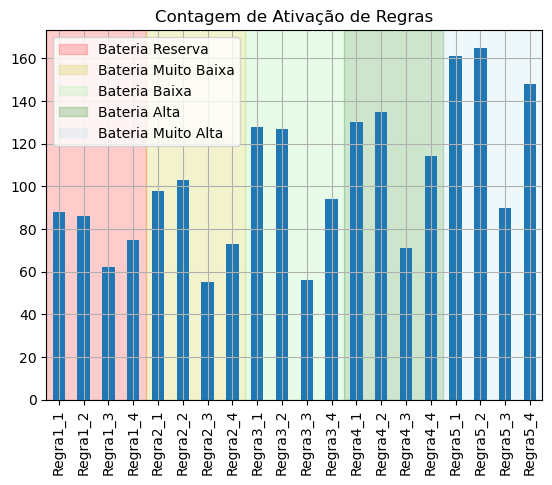

In [ ]:
sr_rules_sum = df_rules_t.sum()

plt.axvspan(-0.5, 3.5, color='red', alpha=0.2, label='Bateria Reserva')
plt.axvspan(3.5, 7.5, color='y', alpha=0.2, label='Bateria Muito Baixa')
plt.axvspan(7.5, 11.5, color='lightgreen', alpha=0.2, label='Bateria Baixa')
plt.axvspan(11.5, 15.5, color='green', alpha=0.2, label='Bateria Alta')
plt.axvspan(15.5, 19.5, color='lightblue', alpha=0.2, label='Bateria Muito Alta')

sr_rules_sum.plot(kind='bar',title='Contagem de Ativação de Regras', grid=True)

plt.legend(loc='upper left', ncol=1)

## Comportamento de Decisão do sistema

De certa forma nosso controlador fuzzy funciona como um modelo classificador binário: 0 (Não Liga) ou 1 (Liga). É possível realizar uma regressão logística para poder identificar o comportamento de decisão do controlador. Será possível também, visualizar uma superfície de decisão logística para visualizar melhor o esse comportamento em relação às duas variáveis trabalhadas. 

In [52]:
rules_columns = [col for col in df_rules_t.columns if col.startswith('Regra')]

df1_results = df1.drop(rules_columns, axis=1).copy()
df2_results = df2.drop(rules_columns, axis=1).copy()
df3_results = df3.drop(rules_columns, axis=1).copy()

In [ ]:
df1_results.head()

,Bateria,Taxa,PertinenciaLiga,PertinenciaNaoLiga,Saida,Class_saida
Index,,,,,,
0,100.00,45,0.56,0.0,67.69,1
1,99.67,0,0.00,1.0,28.00,0
2,99.33,61,0.73,0.0,69.58,1
3,99.00,67,0.50,0.0,66.92,1
4,98.66,90,1.00,0.0,72.00,1


In [ ]:
x_columns = ['Bateria', 'Taxa']
y_column = 'Class_saida'

# 2. Lista com os seus DataFrames
dfs = [df1_results, df2_results, df3_results]

# 3. Dicionários para armazenar os resultados de cada iteração
X_list = {}
y_list = {}
models = {}

# 4. Loop para processar os 3 conjuntos
for i, df in enumerate(dfs, start=1):
    # Dinamiza os nomes das variáveis (X_1, X_2, X_3...)
    X_list[f'X_{i}'] = df[x_columns]
    y_list[f'y_{i}'] = df[y_column]

    # Exemplo: Treinando um modelo para cada conjunto simultaneamente
    model = LogisticRegression()
    model.fit(X_list[f'X_{i}'], y_list[f'y_{i}'])
    models[f'model_{i}'] = model
    
models

{'model_1': LogisticRegression(),
 'model_2': LogisticRegression(),
 'model_3': LogisticRegression()}

c:\Users\Arthur\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Arthur\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Arthur\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


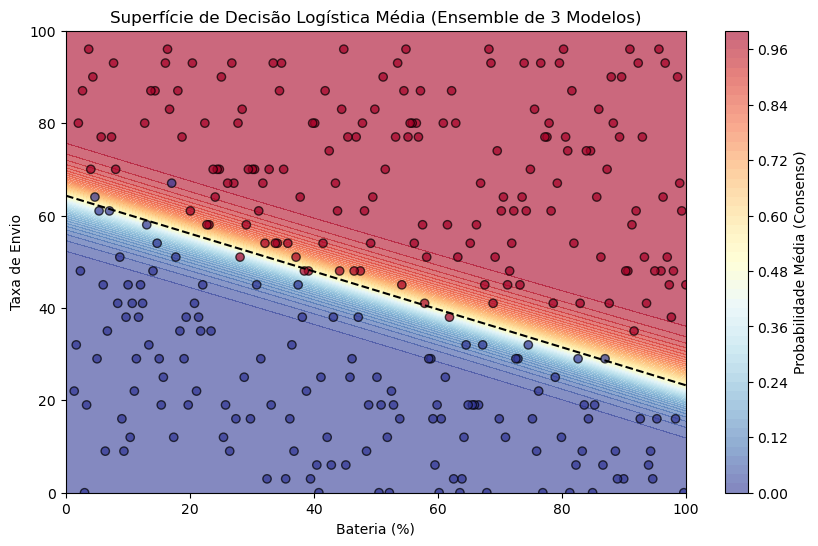

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Configuração da grade (mantendo sua lógica)
x_min, x_max = 0, 100
y_min, y_max = 0, 100

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]

# 2. Loop para coletar probabilidades de todos os modelos
all_probs = []
for name, model in models.items():
    # Obtém a probabilidade da classe 1 para todo o grid
    p = model.predict_proba(grid)[:, 1]
    all_probs.append(p)

# 3. Calcula a MÉDIA das probabilidades
# np.mean com axis=0 calcula a média entre os modelos para cada ponto do grid
mean_probs = np.mean(all_probs, axis=0)
mean_probs_reshaped = mean_probs.reshape(xx.shape)

# 4. Plotagem
plt.figure(figsize=(10, 6))

# Superfície de decisão média
contour = plt.contourf(xx, yy, mean_probs_reshaped, levels=50, cmap='RdYlBu_r', alpha=0.6)
plt.colorbar(contour, label='Probabilidade Média (Consenso)')

# Linha de decisão (onde a probabilidade média é exatamente 0.5)
plt.contour(xx, yy, mean_probs_reshaped, levels=[0.5], colors='black', linestyles='--')

# Pontos reais (usando df1 como referência visual)
plt.scatter(df1_results['Bateria'],
            df1_results['Taxa'],
            c=df1_results['Class_saida'], # Garantindo que a cor venha da coluna correta
            edgecolors='k',
            cmap='RdYlBu_r',
            alpha=0.7)

plt.xlabel('Bateria (%)')
plt.ylabel('Taxa de Envio')
plt.title('Superfície de Decisão Logística Média (Ensemble de 3 Modelos)')
plt.show()

# Pertinência
Esse gráfico demonstra a quantidade de alguns valores de pertinência de saída da função de inferência de Ligar ou Não Ligar o sistema. Percebe-se que existem muitos valores nulos para ambas as funções de saída. Isso se deve ao fato da existência de muitos casos em que o sistema teve certeza na decisão do controlador. Os outros valores maiores que 0 casos em que o controlador teve que decidir entre Ligar ou Não Ligar.

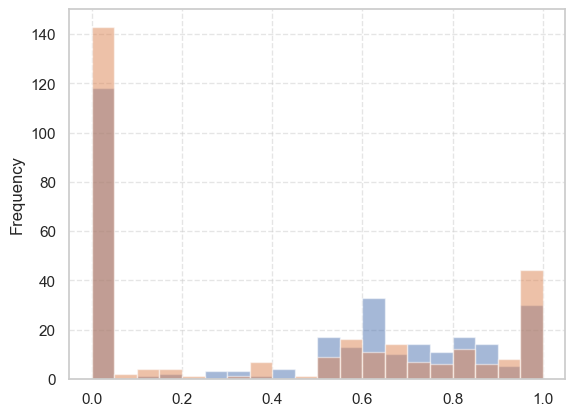

In [307]:
df_results['PertinenciaLiga'].plot(kind='hist', bins=20, label='Pertinência Liga', alpha=0.5)
df_results['PertinenciaNaoLiga'].plot(kind='hist', bins=20, label='Pertinência Não Liga', alpha=0.5)
plt.grid('on', alpha=0.5, linestyle='--')

# Curva de Taxa de Classificação Fuzzy
Com o intuito de visualizar o comportamento do sistema (ligar ou não ligar o sistema) em relação à bateria, será necessário criar uma taxa usando média ponderada de um intervalo de valores. Esse intervalo deve ser suficientemente grande para produzir uma curva suavizada, e suficientemente pequeno para não aumentar o lag causado pelo cálculo dessa média. O lag é calculado por:

$$Lag = \frac{n - 1}{2}$$

Usando 25 pontos, o Lag será de 12 pontos, mas a curva será suavizada de forma que a visualização do comportamento não seja tão comprometida.

Como a o sistema usa a qualidade do sinal para realizar decisões, e essa qualidade é aleatória na simulação, existirá pontos em que a taxa de classificação fuzzy será muito baixa em pontos que poderiam ser altos. Portanto, será necessário usar diversos conjuntos de dados em resposta ao sistema, traçar essas linhas e realizar a média delas. É possível obter mais informações sobre o modelo usando o desvio padrão entre essas linhas.

O desvio padrão demonstra os casos onde o modelo apresenta muita incerteza sobre qual decisão tomar, provavelmente devido a valores de saída em que Liga e Não Liga possuem os mesmos valores.

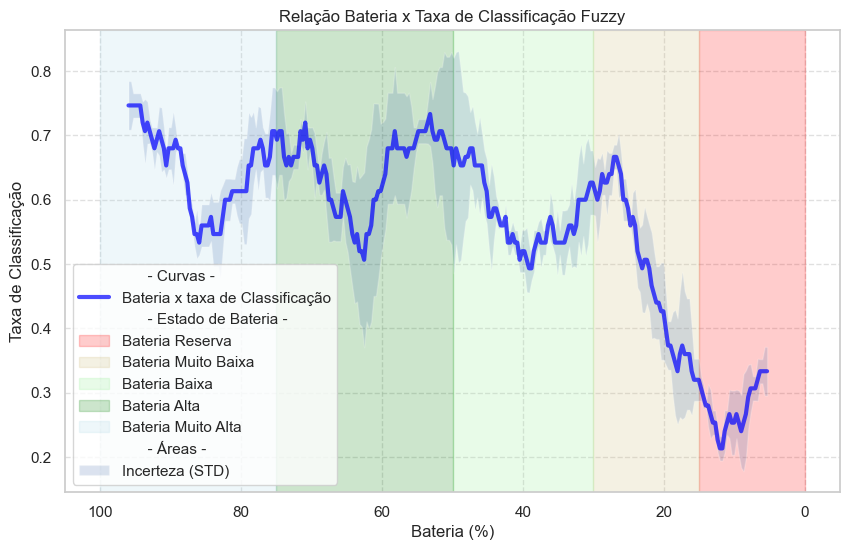

In [ ]:
# 1. Filtra as colunas necessárias
df1_c = df1[['Bateria', 'Class_saida']].copy()
df2_c = df2[['Bateria', 'Class_saida']].copy()
df3_c = df3[['Bateria', 'Class_saida']].copy()

# 2. Calcula a média móvel de 25 linhas (rolling mean)
# Isso substitui todo o seu loop 'for'
batery_class_rate_1 = df1_c.rolling(window=25, center=True).mean().dropna()
batery_class_rate_2 = df2_c.rolling(window=25, center=True).mean().dropna()
batery_class_rate_3 = df3_c.rolling(window=25, center=True).mean().dropna()

batery_class_rate_f = pd.concat([
    batery_class_rate_1.set_index('Bateria')['Class_saida'], 
    batery_class_rate_2.set_index('Bateria')['Class_saida'], 
    batery_class_rate_3.set_index('Bateria')['Class_saida']
], axis=1)

# 2. Calcule a média e desvio para cada LINHA (cada nível de bateria)
batery_class_rate_f['media'] = batery_class_rate_f.mean(axis=1)
batery_class_rate_f['std'] = batery_class_rate_f.std(axis=1)


# 3. Plotagem
plt.figure(figsize=(10, 6))

plt.plot([], [], ' ', label='      - Curvas -')

plt.plot(batery_class_rate_f.index, batery_class_rate_f['media'], 
         label='Bateria x taxa de Classificação', alpha=0.7, color='blue', linewidth=3)

plt.plot([], [], ' ', label='      - Estado de Bateria -')

plt.axvspan(0, 15, color='red', alpha=0.2, label='Bateria Reserva')
plt.axvspan(15, 30, color='y', alpha=0.2, label='Bateria Muito Baixa')
plt.axvspan(30, 50, color='lightgreen', alpha=0.2, label='Bateria Baixa')
plt.axvspan(50, 75, color='green', alpha=0.2, label='Bateria Alta')
plt.axvspan(75, 100, color='lightblue', alpha=0.2, label='Bateria Muito Alta')

plt.plot([], [], ' ', label='      - Áreas -')

plt.fill_between(batery_class_rate_f.index, 
                 batery_class_rate_f['media'] - batery_class_rate_f['std'], 
                 batery_class_rate_f['media'] + batery_class_rate_f['std'], 
                 alpha=0.2, label='Incerteza (STD)')

plt.gca().invert_xaxis()  # Inverte o eixo X (útil para descarga de bateria)
plt.title('Relação Bateria x Índicie de Classificação Fuzzy')
plt.xlabel('Bateria (%)')
plt.ylabel('Taxa de Classificação')

plt.legend(loc='lower left', ncol=1)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Retirando Regras Redundantes

O objetivo é retirar as regras que sempre ativam ao mesmo tempo

In [309]:
# -> Basicamente, o programa identifica as colunas em que são ativadas todas as vezes ao mesmo tempo

def regras_redundantes(df, f1=0, f2=0):
    
    df_columns = df.columns
    
    # -> Declarando listas do tipo set, que garante a não repetição de dados, 
    # separando em listas de regras que não são úteis, pelas listas de regras que são.

    useless_rules_list = set({})
    usefull_rules_list = set({})
    
    # -> Para realizar a comparação de cada coluna com as outras posteriores,
    # é necessário declarar um for(for), onde o primeiro troca a coluna analisada, 
    # e o segundo troca as colunas que estão sendo comparadas com a coluna analisada

    for f1 in range(len(df.columns)):
        for f2 in range(len(df.columns)):
            
            # -> Se as colunas não forem iguais (evitando a comparação da coluna com ela mesma)
            if f1 != f2:
                
                # -> Usando um dataframe auxiliar que carrega 2 colunas: coluna analizada, e coluna comparada, 
                # em que suas linhas tem valores iguais a 1, e iguais entre sí
                df_aux1 = df.loc[(df[df_columns[f1]] == df[df_columns[f2]]) & (df[df_columns[f2]] == 1),]
                
                # -> Outro Dataframe auxiliar que carrega a coluna comparada, em que apenas possuem valores iguais a 1
                df_aux2 = df.loc[df[df_columns[f2]] == 1,]
                
                # -> O funcionamento do for(for) compara a coluna analisada com as outras colunas anteriores   
                # -> Será comparado então, de que se a coluna analizada tiver o mesmo tamanho que a coluna comparada, 
                # ou seja, sempre que a coluna analiasada é ativada, a coluna comparada também;
                if len(df_aux1[[df_columns[f1], df_columns[f2]]]) == len(df_aux2[df_columns[f2]]):
                    
                    # -> a coluna analisada será avaliada como sobreposta a àquela que foi comparada,
                    # pois a coluna comparada, de certa forma, terá mais ativações que a analisada,
                    # e vai sobressair a àquela que foi analisada.
                    useless_rules_list.add(df_columns[f1])
                    usefull_rules_list.add(df_columns[f2])

    print('Regras sobrepostas:\n',useless_rules_list)
    print(127*'-')
    print('Regras que sobressaem:\n',usefull_rules_list)

In [310]:
regras_redundantes(df_rules)

Regras sobrepostas:
 set()
-------------------------------------------------------------------------------------------------------------------------------
Regras que sobressaem:
 set()


# A sensibilidade de Regras Fuzzy

Até onde eu sei, a biblioteca eFLL (Embedded Fuzzy Logic Library) para lógica fuzzy em C++ oferece ferramentas para implementar sistemas de lógica fuzzy, mas não possui diretamente uma função embutida para avaliar a sensibilidade das regras em um controlador fuzzy.

A avaliação da sensibilidade das regras em um controlador fuzzy geralmente envolve técnicas analíticas ou métodos de otimização, como sensibilidade de parâmetros ou análise de influência das regras na saída do controlador. Essas análises podem ser implementadas independentemente do uso de uma biblioteca específica, usando métodos estatísticos ou de aprendizado de máquina para avaliar a importância das regras.

# Resultados

Aqui estão os resultados comparando a geração dos controladores criados